In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
from google.colab import files

# Paths to input and output files
xml_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/drugbank.xml"  # Replace with the actual path to your DrugBank XML file
input_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/cleaned_drug_targets.xls"  # Replace with the actual path to your .xls file
output_csv = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/updated_drug_targets.csv"  # Desired output file path

# Load the DrugBank XML file
print("Loading DrugBank XML...")
tree = ET.parse(xml_file)
root = tree.getroot()

# Preload drug_id -> drug_name mappings for faster lookups
print("Preloading drug names...")
drug_name_dict = {}
for drug in root.findall(".//{http://www.drugbank.ca}drug"):
    drugbank_id = drug.find("{http://www.drugbank.ca}drugbank-id").text
    name = drug.find("{http://www.drugbank.ca}name").text
    drug_name_dict[drugbank_id] = name

# Function to fetch the drug name from the preloaded dictionary
def get_drug_name_from_dict(drug_id):
    return drug_name_dict.get(drug_id, None)

# Load the drug_targets file
print("Loading drug_targets file...")
try:
    drug_targets_df = pd.read_excel(input_file)  # Use read_excel for .xls files
except Exception as e:
    print(f"Error reading file: {e}")
    raise

# Add the drug_name column to the DataFrame
print("Mapping drug names...")
drug_targets_df["drug_name"] = drug_targets_df["drug_id"].apply(get_drug_name_from_dict)

# Fill missing drug names with "Unknown" (optional)
drug_targets_df["drug_name"].fillna("Unknown", inplace=True)

# Save the updated DataFrame to a new CSV file
print("Saving the updated file...")
drug_targets_df.to_csv(output_csv, index=False)

# Download the updated file
print("Downloading the updated file...")
files.download(output_csv)

print(f"Updated file with drug names saved to: {output_csv}")


Loading DrugBank XML...
Preloading drug names...
Loading drug_targets file...
Mapping drug names...
Saving the updated file...


<ipython-input-2-37d8853a63ff>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drug_targets_df["drug_name"].fillna("Unknown", inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated file with drug names saved to: /content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/updated_drug_targets.csv


In [ ]:
import pandas as pd
from IPython.display import display
# Step 4: Count unique drug IDs associated with each protein ID
protein_drug_count = drug_targets_df.groupby("protein_id")["drug_id"].nunique().reset_index()
protein_drug_count.columns = ["protein_id", "drug_count"]

# Step 5: Merge protein names for better context
protein_info = drug_targets_df[["protein_id", "protein_name"]].drop_duplicates()
protein_drug_count = protein_drug_count.merge(protein_info, on="protein_id")

# Step 6: Sort data for visualization
protein_drug_count = protein_drug_count.sort_values(by="drug_count", ascending=False)


# Step 8: Display the processed data
from IPython.display import display
display(protein_drug_count)

,protein_id,drug_count,protein_name
1935,P24941,136,Cyclin-dependent kinase 2
2270,P35348,122,Alpha-1A adrenergic receptor
671,P03372,120,Estrogen receptor
2041,P28223,116,5-hydroxytryptamine receptor 2A
506,P00734,115,Prothrombin
...,...,...,...
2379,P39805,1,Transcription antiterminator LicT
2380,P39841,1,Putative mannose-6-phosphate isomerase YvyI
2382,P39905,1,Glial cell line-derived neurotrophic factor
2383,P40145,1,Adenylate cyclase type 8


# Visualisations

### Top 10 Drugs by Number of Target Proteins

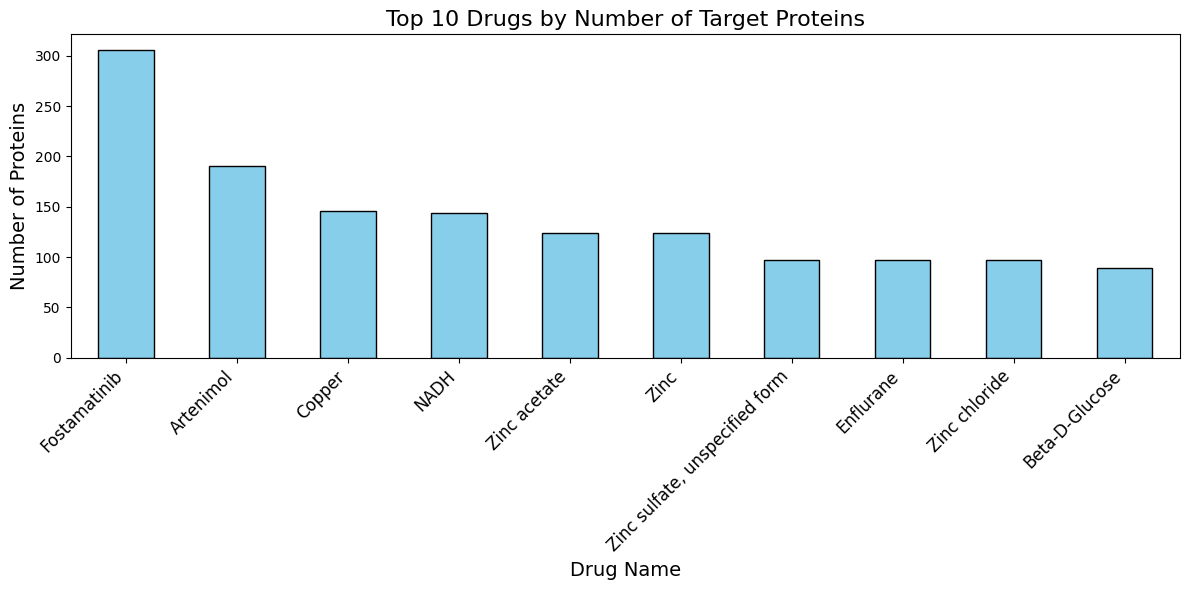

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
drug_targets_csv = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/updated_drug_targets.csv"  # Path to drug_targets.csv
drug_targets_df = pd.read_csv(drug_targets_csv)

# Count the number of proteins for each drug
drug_protein_counts = drug_targets_df.groupby("drug_name")["protein_id"].count().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
drug_protein_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Drugs by Number of Target Proteins", fontsize=16)
plt.xlabel("Drug Name", fontsize=14)
plt.ylabel("Number of Proteins", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()


### Top 10 Proteins Targeted by Drugs

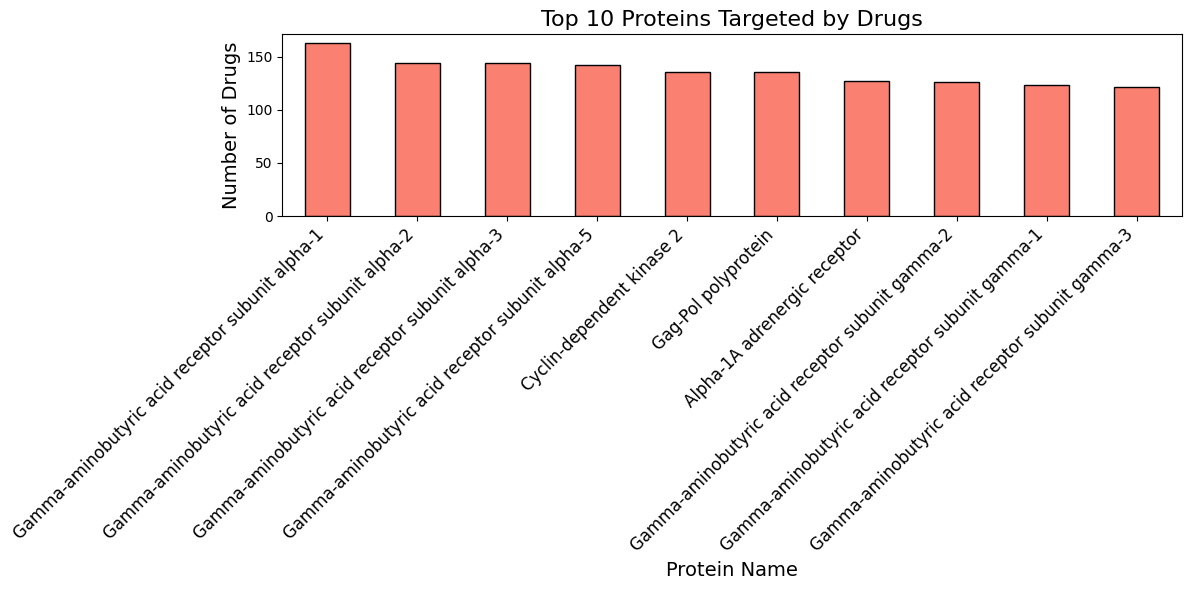

In [ ]:
# Count the number of drugs for each protein
protein_drug_counts = drug_targets_df.groupby("protein_name")["drug_id"].count().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
protein_drug_counts.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Top 10 Proteins Targeted by Drugs", fontsize=16)
plt.xlabel("Protein Name", fontsize=14)
plt.ylabel("Number of Drugs", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()


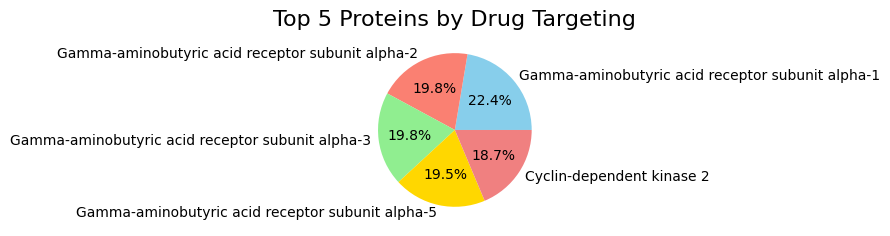

In [ ]:
# Count drugs for each protein
protein_counts = drug_targets_df["protein_name"].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 8))
protein_counts.plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon", "lightgreen", "gold", "lightcoral"])
plt.title("Top 5 Proteins by Drug Targeting", fontsize=16)
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


### Proteins Associated with Drug DB00303

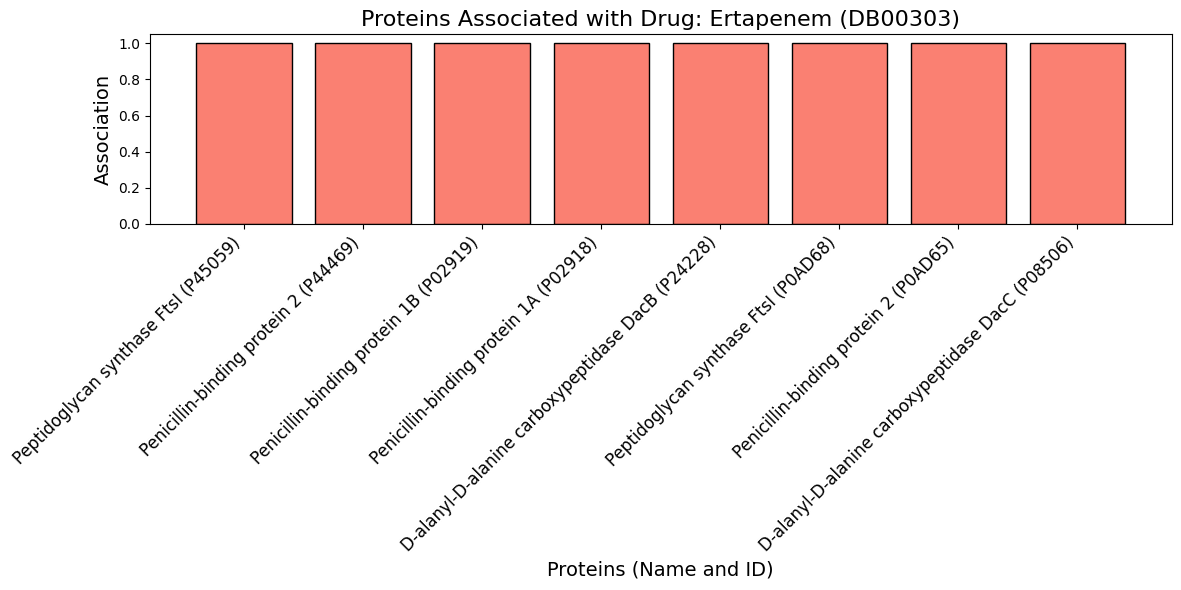

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter by a specific drug (example: DB00303)
drug_id = "DB00303"
drug_name = drug_targets_df.loc[drug_targets_df["drug_id"] == drug_id, "drug_name"].iloc[0]

# Get all proteins associated with this drug
associated_proteins = drug_targets_df[drug_targets_df["drug_id"] == drug_id]

# Prepare data for plotting
protein_names = associated_proteins["protein_name"].values
protein_ids = associated_proteins["protein_id"].values
protein_labels = [f"{protein_name} ({protein_id})" for protein_name, protein_id in zip(protein_names, protein_ids)]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(protein_labels, [1] * len(protein_labels), color="salmon", edgecolor="black")
plt.title(f"Proteins Associated with Drug: {drug_name} ({drug_id})", fontsize=16)
plt.xlabel("Proteins (Name and ID)", fontsize=14)
plt.ylabel("Association", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()


### Protein-Drug Interaction Chord Diagram P35228

In [ ]:
import plotly.graph_objects as go

# Define the protein ID and retrieve the protein name
protein_id = "P35228"
protein_name = drug_targets_df.loc[drug_targets_df["protein_id"] == protein_id, "protein_name"].iloc[0]

# Get all drugs associated with this protein
associated_drugs = drug_targets_df[drug_targets_df["protein_id"] == protein_id]

# Trim names to improve visualization clarity
def trim_name(name, max_length=12):
    """Trim a name to a specified max length, adding '...' if trimmed."""
    return name if len(name) <= max_length else name[:max_length-3] + "..."

# Prepare trimmed labels
drug_names = associated_drugs["drug_name"].apply(lambda x: trim_name(x)).values
drug_ids = associated_drugs["drug_id"].values
drug_labels = [f"{trim_name(drug_name)} ({drug_id})" for drug_name, drug_id in zip(drug_names, drug_ids)]

# Create the list of unique nodes (protein + drugs)
nodes = [protein_name] + drug_labels

# Map each node to its index
node_map = {node: i for i, node in enumerate(nodes)}

# Prepare source and target indices
sources = [node_map[protein_name]] * len(drug_labels)  # All links originate from the protein
targets = [node_map[label] for label in drug_labels]   # All links point to drug labels

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,  # Unique list of nodes (protein + drugs)
    ),
    link=dict(
        source=sources,  # Indices of the source nodes
        target=targets,  # Indices of the target nodes
        value=[1] * len(targets),  # All links have equal weight (value)
    )
)])

# Update layout
fig.update_layout(
    title_text=f"Protein-Drug Interaction Chord Diagram for {protein_name} ({protein_id})",
    font_size=10
)

# Show the diagram
fig.show()



### Sankey Diagram for Drug ID with Multiple Protein IDs

In [ ]:
import plotly.graph_objects as go

# Define the drug ID to analyze
drug_id = "DB00303"  # Example drug ID
drug_name = drug_targets_df.loc[drug_targets_df["drug_id"] == drug_id, "drug_name"].iloc[0]

# Get all proteins associated with this drug
associated_proteins = drug_targets_df[drug_targets_df["drug_id"] == drug_id]

# Trim names to improve visualization clarity
def trim_name(name, max_length=12):
    """Trim a name to a specified max length, adding '...' if trimmed."""
    return name if len(name) <= max_length else name[:max_length-3] + "..."

# Prepare trimmed labels
protein_names = associated_proteins["protein_name"].apply(lambda x: trim_name(x)).values
protein_ids = associated_proteins["protein_id"].values
protein_labels = [f"{trim_name(protein_name)} ({protein_id})" for protein_name, protein_id in zip(protein_names, protein_ids)]

# Create the list of unique nodes (drug + proteins)
nodes = [drug_name] + protein_labels

# Map each node to its index
node_map = {node: i for i, node in enumerate(nodes)}

# Prepare source and target indices
sources = [node_map[drug_name]] * len(protein_labels)  # All links originate from the drug
targets = [node_map[label] for label in protein_labels]  # All links point to protein labels

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,  # Unique list of nodes (drug + proteins)
    ),
    link=dict(
        source=sources,  # Indices of the source nodes
        target=targets,  # Indices of the target nodes
        value=[1] * len(targets),  # All links have equal weight (value)
    )
)])

# Update layout
fig.update_layout(
    title_text=f"Drug-Protein Interaction Chord Diagram for {drug_name} ({drug_id})",
    font_size=10
)

# Show the diagram
fig.show()


### Drug-Protein Circular Diagram for DB00303

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data for visualization
data = pd.DataFrame({
    "Drug": [drug_name] * len(protein_labels),
    "Protein": protein_labels
})

# Create a sunburst chart
fig = px.sunburst(
    data,
    path=["Drug", "Protein"],
    title=f"Drug-Protein Circular Diagram for {drug_name} ({drug_id})",
    width=800,
    height=800
)

fig.update_traces(textinfo="label+percent entry")
fig.show()
